## 월별 2020 데이터 합치고 성동구만 남기기

In [356]:
import pandas as pd


In [ ]:
# 데이터 불러오기 
names = pd.read_csv("../분석 프로젝트2/data/tpss_bcycl_od_statnhm_202012.csv",encoding='cp949',index_col=None)
names.head()



,기준_날짜,구분코드,기준_시간,시작_대여소ID,시작_대여소명,종료_대여소ID,종료_대여소명,전체건수,전체이용시간(분),전체이용거리(m)
0,20201101,1,0,ST-33,북가좌2동_004_1,ST-33,북가좌2동_004_1,1,92,0.0
1,20201101,1,0,ST-683,노량진1동_001_3,ST-1150,노량진1동_041_1,2,258,54160.0
2,20201101,1,0,ST-1469,창2동_036_1,ST-643,수유3동_017_1,1,10,0.0
3,20201101,1,0,ST-834,등촌3동_053_3,ST-829,화곡1동_002_1,1,29,0.0
4,20201101,1,0,ST-296,여의동_002_1,ST-1693,도화동_035_1,1,54,0.0


In [380]:
# 대여소 아이디 받아오기 
id= pd.read_csv("../분석 프로젝트2/data/따릉이_성동구_대여소.csv",encoding='utf8')
drop_ids = ['ST-1738', 'ST-1737']

# 대여소ID가 drop_ids에 없는 행만 남기기
id = id[~id['대여소_ID'].isin(drop_ids)]

id=id['대여소_ID']


In [359]:
#id가 포함된 내용만 Ture 표시 
names['대여소_포함'] = names['시작_대여소ID'].isin(id) | names['종료_대여소ID'].isin(id)

In [360]:
names[names['대여소_포함']==True]

,기준_날짜,구분코드,기준_시간,시작_대여소ID,시작_대여소명,종료_대여소ID,종료_대여소명,전체건수,전체이용시간(분),전체이용거리(m),대여소_포함
5,20201101,1,0,ST-446,성수2가1동_020_1,ST-111,성수1가2동_030_1,1,10,0.0,True
17,20201101,1,0,ST-371,송정동_019_2,ST-2310,화양동_038_1,1,9,0.0,True
30,20201101,1,0,ST-2326,사근동_018_1,ST-2326,사근동_018_1,1,1,0.0,True
38,20201101,1,0,ST-603,공릉2동_065_1,ST-2326,사근동_018_1,2,151,0.0,True
47,20201101,1,0,ST-372,마장동_034_2,ST-376,마장동_032_1,1,108,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
3872988,20201130,1,2355,ST-1788,동화동_010_1,ST-236,왕십리2동_011_2,1,9,0.0,True
3873015,20201130,0,2355,ST-392,전농1동_052_1,ST-244,왕십리도선동_008_1,1,8,0.0,True
3873041,20201130,1,2355,ST-243,용답동_003_1,ST-97,화양동_040_1,1,14,0.0,True
3873082,20201130,0,2355,ST-363,송정동_009_1,ST-1263,군자동_038_1,1,16,0.0,True


In [361]:
names = names[names['대여소_포함']]


In [362]:
names.columns

Index(['기준_날짜', '구분코드', '기준_시간', '시작_대여소ID', '시작_대여소명', '종료_대여소ID', '종료_대여소명',
       '전체건수', '전체이용시간(분)', '전체이용거리(m)', '대여소_포함'],
      dtype='object')

In [363]:
# 컬럼 사이 공백 지우기 
names.columns = names.columns.str.strip()

In [364]:
names = names[['기준_날짜', '시작_대여소ID', '종료_대여소ID', '전체이용시간(분)', '전체이용거리(m)']]



In [365]:
names['대여'] = names['시작_대여소ID'].isin(id)
names['반납'] = names['종료_대여소ID'].isin(id)

In [366]:
names

,기준_날짜,시작_대여소ID,종료_대여소ID,전체이용시간(분),전체이용거리(m),대여,반납
5,20201101,ST-446,ST-111,10,0.0,True,True
17,20201101,ST-371,ST-2310,9,0.0,True,False
30,20201101,ST-2326,ST-2326,1,0.0,True,True
38,20201101,ST-603,ST-2326,151,0.0,False,True
47,20201101,ST-372,ST-376,108,0.0,True,True
...,...,...,...,...,...,...,...
3872988,20201130,ST-1788,ST-236,9,0.0,False,True
3873015,20201130,ST-392,ST-244,8,0.0,False,True
3873041,20201130,ST-243,ST-97,14,0.0,True,False
3873082,20201130,ST-363,ST-1263,16,0.0,True,False


In [367]:
names = names[
    ~(
        (names['전체이용시간(분)'] == 0) &
        (names['시작_대여소ID'] == names['종료_대여소ID']) &
        (names['전체이용거리(m)'] == 0.00)
    )
]


In [368]:
names

,기준_날짜,시작_대여소ID,종료_대여소ID,전체이용시간(분),전체이용거리(m),대여,반납
5,20201101,ST-446,ST-111,10,0.0,True,True
17,20201101,ST-371,ST-2310,9,0.0,True,False
30,20201101,ST-2326,ST-2326,1,0.0,True,True
38,20201101,ST-603,ST-2326,151,0.0,False,True
47,20201101,ST-372,ST-376,108,0.0,True,True
...,...,...,...,...,...,...,...
3872988,20201130,ST-1788,ST-236,9,0.0,False,True
3873015,20201130,ST-392,ST-244,8,0.0,False,True
3873041,20201130,ST-243,ST-97,14,0.0,True,False
3873082,20201130,ST-363,ST-1263,16,0.0,True,False


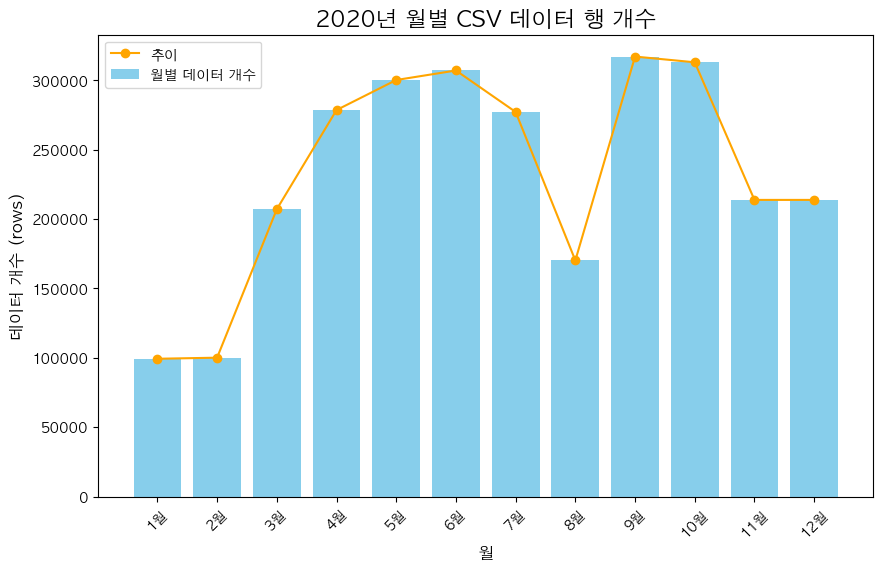

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정 (Mac)
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

# 파일 리스트 (1월~12월 CSV 경로 직접 넣기)
csv_files = [
    '../분석 프로젝트2/따릉이_2020_1.csv', '../분석 프로젝트2/따릉이_2020_2.csv', '../분석 프로젝트2/따릉이_2020_3.csv', '../분석 프로젝트2/따릉이_2020_4.csv',
    '../분석 프로젝트2/따릉이_2020_5.csv', '../분석 프로젝트2/따릉이_2020_6.csv', '../분석 프로젝트2/따릉이_2020_7.csv', '../분석 프로젝트2/따릉이_2020_8.csv',
    '../분석 프로젝트2/따릉이_2020_9.csv', '../분석 프로젝트2/따릉이_2020_10.csv', '../분석 프로젝트2/따릉이_2020_11.csv', '../분석 프로젝트2/따릉이_2020_12.csv'
]

# 월별 데이터 개수 저장할 리스트
month_counts = []

# 각 파일에서 데이터 개수 세기
for file in csv_files:
    df = pd.read_csv(file, encoding='utf-8-sig')  # 인코딩 필요시 cp949로 변경
    count = len(df)
    month_counts.append(count)

# 월 레이블
months = [f"{i}월" for i in range(1, 13)]

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(months, month_counts, color='skyblue', label='월별 데이터 개수')
plt.plot(months, month_counts, color='orange', marker='o', linestyle='-', label='추이')

# 꾸미기
plt.title('2020년 월별 CSV 데이터 행 개수', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('데이터 개수 (rows)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.show()



월
1    2797123
Name: count, dtype: int64
